# 1. Dependencias
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose


# 2. Carga de datos 
---

In [2]:
df_admission = pd.read_csv("./data/HDHI_admission_data.csv")
df_weather = pd.read_csv("./data/HDHI_pollution_data.csv")

In [3]:
# Limpiamos y renombramos las columnas originales del df
df_admission.columns = df_admission.columns.str.strip()

mapping = {
    'SNO': 'serial_number',
    'MRD No.': 'mrd_number',
    'D.O.A': 'admission_date',
    'D.O.D': 'discharge_date',
    'AGE': 'age',
    'GENDER': 'gender',
    'RURAL': 'residence_rural',
    'TYPE OF ADMISSION-EMERGENCY/OPD': 'admission_type',
    'month year': 'admission_month_year',
    'DURATION OF STAY': 'length_of_stay_days',
    'duration of intensive unit stay': 'icu_length_of_stay_days',
    'OUTCOME': 'hospital_outcome',
    'SMOKING': 'smoking_status',
    'ALCOHOL': 'alcohol_use',
    'DM': 'diabetes',
    'HTN': 'hypertension',
    'CAD': 'coronary_artery_disease',
    'PRIOR CMP': 'prior_cva',                     # CMP -> cerebrovascular accident (ajusta si tu significado es otro)
    'CKD': 'chronic_kidney_disease',
    'HB': 'hemoglobin_g_dl',
    'TLC': 'total_leukocyte_count',
    'PLATELETS': 'platelet_count',
    'GLUCOSE': 'glucose_mg_dl',
    'UREA': 'urea_mg_dl',
    'CREATININE': 'creatinine_mg_dl',
    'BNP': 'bnp',
    'RAISED CARDIAC ENZYMES': 'raised_cardiac_enzymes',
    'EF': 'ejection_fraction_percent',
    'SEVERE ANAEMIA': 'severe_anemia',
    'ANAEMIA': 'anemia',
    'STABLE ANGINA': 'stable_angina',
    'ACS': 'acute_coronary_syndrome',
    'STEMI': 'stemi',
    'ATYPICAL CHEST PAIN': 'atypical_chest_pain',
    'HEART FAILURE': 'heart_failure',
    'HFREF': 'hf_ref',                             # HFrEF (reduced EF)
    'HFNEF': 'hf_nef',                             # HFpEF/HFNEF (preserv. EF) — cambia si prefieres hf_pef
    'VALVULAR': 'valvular_disease',
    'CHB': 'complete_heart_block',
    'SSS': 'sick_sinus_syndrome',
    'AKI': 'acute_kidney_injury',
    'CVA INFRACT': 'cva_infarct',
    'CVA BLEED': 'cva_bleed',
    'AF': 'atrial_fibrillation',
    'VT': 'ventricular_tachycardia',
    'PSVT': 'psvt',
    'CONGENITAL': 'congenital_heart_disease',
    'UTI': 'urinary_tract_infection',
    'NEURO CARDIOGENIC SYNCOPE': 'neurocardiogenic_syncope',
    'ORTHOSTATIC': 'orthostatic_hypotension',
    'INFECTIVE ENDOCARDITIS': 'infective_endocarditis',
    'DVT': 'deep_vein_thrombosis',
    'CARDIOGENIC SHOCK': 'cardiogenic_shock',
    'SHOCK': 'shock',
    'PULMONARY EMBOLISM': 'pulmonary_embolism',
    'CHEST INFECTION': 'chest_infection'
}

df_admission.rename(columns=mapping, inplace=True)

In [4]:
# Estructura del dataset
df_admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   serial_number              15757 non-null  int64 
 1   mrd_number                 15757 non-null  object
 2   admission_date             15757 non-null  object
 3   discharge_date             15757 non-null  object
 4   age                        15757 non-null  int64 
 5   gender                     15757 non-null  object
 6   residence_rural            15757 non-null  object
 7   admission_type             15757 non-null  object
 8   admission_month_year       15757 non-null  object
 9   length_of_stay_days        15757 non-null  int64 
 10  icu_length_of_stay_days    15757 non-null  int64 
 11  hospital_outcome           15757 non-null  object
 12  smoking_status             15757 non-null  int64 
 13  alcohol_use                15757 non-null  int64 
 14  diabet

In [5]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE                 737 non-null    object 
 1   AQI                  737 non-null    int64  
 2   PM2.5 AVG            737 non-null    int64  
 3   PM2.5 MIN            737 non-null    int64  
 4   PM2.5 MAX            737 non-null    int64  
 5   PM10 AVG             737 non-null    int64  
 6   PM10 MIN             737 non-null    int64  
 7   PM10 MAX             737 non-null    object 
 8   NO2 AVG              737 non-null    int64  
 9   NO2 MIN              737 non-null    int64  
 10  NO2 MAX              737 non-null    object 
 11  NH3 AVG              737 non-null    int64  
 12  NH3 MIN              737 non-null    int64  
 13  NH3 MAX              737 non-null    int64  
 14  SO2 AVG              737 non-null    int64  
 15  SO2 MIN              737 non-null    int

In [6]:
df_admission.head()

,serial_number,mrd_number,admission_date,discharge_date,age,gender,residence_rural,admission_type,admission_month_year,length_of_stay_days,...,congenital_heart_disease,urinary_tract_infection,neurocardiogenic_syncope,orthostatic_hypotension,infective_endocarditis,deep_vein_thrombosis,cardiogenic_shock,shock,pulmonary_embolism,chest_infection
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_weather.head()

,DATE,AQI,PM2.5 AVG,PM2.5 MIN,PM2.5 MAX,PM10 AVG,PM10 MIN,PM10 MAX,NO2 AVG,NO2 MIN,...,CO AVG,CO MIN,CO MAX,OZONE AVG,OZONE MIN,OZONE MAX,PROMINENT POLLUTENT,MAX TEMP,MIN TEMP,HUMIDITY
0,3/25/2017,75,75,45,210,74,50,110,28,40,...,34,1,49,38,21,70,PM2.5,36,18,32.0
1,3/26/2017,82,82,47,153,75,65,86,29,26,...,32,7,55,30,8,70,PM2.5,38,19,23.0
2,3/27/2017,72,72,63,150,71,45,98,38,34,...,40,10,68,26,18,53,PM2.5,40,20,14.0
3,3/28/2017,80,78,63,88,80,73,87,39,37,...,25,12,48,21,4,71,PM10,40,21,36.0
4,3/29/2017,73,64,53,75,73,63,86,38,36,...,35,20,54,32,6,56,PM10,40,23,31.0


# 3. Limpieza y normalizacion
---

In [8]:
_MONTH_MAP = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12,
}


def parse_with_disambiguation(
    df,
    date_col,
    month_hint_col=None,
    admission_col=None,
    los_col=None,
    tolerance=2
):
    """
    Corrige y convierte una columna de fechas cuando existen ambigüedades
    en el formato (por ejemplo: mezcla de DD/MM/YYYY y MM/DD/YYYY).

    Funcionalidades principales:
    ----------------------------------------------------------
    1. Intenta dos conversiones: con `dayfirst=True` y `dayfirst=False`.
    2. Usa la conversión válida; si ambas son válidas pero con meses distintos,
       utiliza una columna auxiliar de referencia (`month_hint_col`) si existe.
    3. En columnas de alta hospitalaria (`discharge_date`), valida la coherencia
       con la fecha de admisión (`admission_col`) y la duración de la estancia (`los_col`).
       Si hay diferencias mayores a `tolerance`, recalcula la fecha de alta.

    Parámetros:
    ----------------------------------------------------------
    df : DataFrame
        DataFrame con los datos originales.
    date_col : str
        Nombre de la columna de fechas a corregir.
    month_hint_col : str, opcional
        Columna que contiene un mes de referencia (ej: 'Apr-17').
    admission_col : str, opcional
        Columna con la fecha de admisión (solo para validaciones de alta).
    los_col : str, opcional
        Columna con la duración de estancia en días (length_of_stay_days).
    tolerance : int, opcional
        Diferencia máxima permitida (en días) entre la duración esperada y calculada.
    """

    # ----------------------------------------------------------------------
    #  1. Convertir la columna a texto y realizar dos intentos de parseo:
    #    - Uno suponiendo formato "día/mes/año"
    #    - Otro suponiendo "mes/día/año"
    # ----------------------------------------------------------------------
    raw = df[date_col].astype(str)
    d_dayfirst = pd.to_datetime(raw, errors='coerce', dayfirst=True)
    d_monthfirst = pd.to_datetime(raw, errors='coerce', dayfirst=False)

    # ----------------------------------------------------------------------
    # 2. Base: usar el primer parse válido; si alguno es NaT, reemplazarlo
    #    por el valor obtenido del otro formato.
    # ----------------------------------------------------------------------
    result = d_dayfirst.fillna(d_monthfirst)

    # ----------------------------------------------------------------------
    # 3. Detectar casos ambiguos:
    #    Ambos parseos son válidos pero generan meses distintos.
    # ----------------------------------------------------------------------
    amb_mask = (
        d_dayfirst.notna()
        & d_monthfirst.notna()
        & (d_dayfirst.dt.month != d_monthfirst.dt.month)
    )

    # ----------------------------------------------------------------------
    # 4. Resolver ambigüedades usando una pista del mes (month_hint_col)
    # ----------------------------------------------------------------------
    if month_hint_col is not None and month_hint_col in df.columns:
        # Extraer abreviatura de mes (ej: 'Apr' de 'Apr-17') y convertirla a número
        hint_str = df.loc[amb_mask, month_hint_col].astype(str).str[:3]
        hint_month = hint_str.map(_MONTH_MAP)

        # Determinar qué parseo coincide con el mes esperado
        use_dayfirst = d_dayfirst.loc[amb_mask].dt.month.eq(hint_month)

        # Usar el formato correcto en cada fila
        chosen = d_dayfirst.loc[amb_mask].where(use_dayfirst, d_monthfirst.loc[amb_mask])
        result.loc[amb_mask] = chosen
    else:
        # Si no hay columna de referencia, priorizamos formato mes/día/año
        result.loc[amb_mask] = d_monthfirst.loc[amb_mask]

    # ----------------------------------------------------------------------
    # 5. Validación específica para columnas de alta hospitalaria
    #    (requiere columnas de admisión y duración de estancia)
    # ----------------------------------------------------------------------
    if admission_col and los_col and all(col in df.columns for col in [admission_col, los_col]):

        # Parsear la fecha de admisión y obtener la duración esperada
        adm = pd.to_datetime(df[admission_col], errors="coerce")
        los = df[los_col]

        # Calcular la duración actual según las fechas parseadas
        stay_diff = (result - adm).dt.days

        # Detectar inconsistencias que exceden el margen de tolerancia
        bad_mask = stay_diff.sub(los).abs() > tolerance

        if bad_mask.any():
            # Recalcular discharge_date = admission_date + length_of_stay_days
            result.loc[bad_mask] = adm.loc[bad_mask] + pd.to_timedelta(los.loc[bad_mask], unit="D")

        # Verificación final posterior a la corrección
        new_diff = (result - adm).dt.days
        inconsistentes = (new_diff.sub(los).abs() > tolerance).sum()

        if inconsistentes:
            print(f"{inconsistentes} filas aún no coinciden tras la corrección en '{date_col}'.")

    # ----------------------------------------------------------------------
    # 6. Devolver la serie corregida
    # ----------------------------------------------------------------------
    return result

In [9]:
# Parsear admission_date usando la pista de mes
df_admission['admission_date'] = parse_with_disambiguation(
    df_admission,
    date_col='admission_date',
    month_hint_col='admission_month_year'
)

# Parsear discharge_date verificando coherencia con length_of_stay_days
df_admission['discharge_date'] = parse_with_disambiguation(
    df_admission,
    date_col='discharge_date',
    month_hint_col=None,  # no siempre disponible
    admission_col='admission_date',
    los_col='length_of_stay_days',
    tolerance=2
)


df_weather['DATE'] = pd.to_datetime(
  df_weather['DATE'], 
  dayfirst=False, 
  errors='coerce'
)

df_admission.head(10)

,serial_number,mrd_number,admission_date,discharge_date,age,gender,residence_rural,admission_type,admission_month_year,length_of_stay_days,...,congenital_heart_disease,urinary_tract_infection,neurocardiogenic_syncope,orthostatic_hypotension,infective_endocarditis,deep_vein_thrombosis,cardiogenic_shock,shock,pulmonary_embolism,chest_infection
0,1,234735,2017-04-01,2017-04-03,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,2017-04-01,2017-04-05,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,2017-04-01,2017-04-03,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,2017-04-01,2017-04-08,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,2017-04-01,2017-04-23,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0
5,6,234675,2017-04-01,2017-04-10,44,M,U,E,Apr-17,10,...,0,0,0,0,0,0,0,0,0,0
6,7,234563,2017-04-01,2017-04-06,56,F,U,E,Apr-17,6,...,0,0,0,0,0,0,0,0,0,0
7,8,208455,2017-04-01,2017-04-13,47,M,U,E,Apr-17,13,...,0,0,0,0,0,0,0,0,0,0
8,9,67070,2017-04-01,2017-04-03,65,F,U,E,Apr-17,3,...,0,0,0,0,0,0,0,1,0,0
9,10,153218,2017-04-01,2017-04-03,59,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_weather.head(5)

,DATE,AQI,PM2.5 AVG,PM2.5 MIN,PM2.5 MAX,PM10 AVG,PM10 MIN,PM10 MAX,NO2 AVG,NO2 MIN,...,CO AVG,CO MIN,CO MAX,OZONE AVG,OZONE MIN,OZONE MAX,PROMINENT POLLUTENT,MAX TEMP,MIN TEMP,HUMIDITY
0,2017-03-25,75,75,45,210,74,50,110,28,40,...,34,1,49,38,21,70,PM2.5,36,18,32.0
1,2017-03-26,82,82,47,153,75,65,86,29,26,...,32,7,55,30,8,70,PM2.5,38,19,23.0
2,2017-03-27,72,72,63,150,71,45,98,38,34,...,40,10,68,26,18,53,PM2.5,40,20,14.0
3,2017-03-28,80,78,63,88,80,73,87,39,37,...,25,12,48,21,4,71,PM10,40,21,36.0
4,2017-03-29,73,64,53,75,73,63,86,38,36,...,35,20,54,32,6,56,PM10,40,23,31.0


In [11]:
# Mostramos los valores nulos
df_admission.isna().sum().sort_values(ascending=False)

bnp                          8441
ejection_fraction_percent    1505
glucose_mg_dl                 863
total_leukocyte_count         286
platelet_count                285
hemoglobin_g_dl               252
creatinine_mg_dl              247
urea_mg_dl                    241
discharge_date                  1
serial_number                   0
acute_kidney_injury             0
hf_ref                          0
hf_nef                          0
valvular_disease                0
complete_heart_block            0
sick_sinus_syndrome             0
cva_infarct                     0
atypical_chest_pain             0
cva_bleed                       0
atrial_fibrillation             0
ventricular_tachycardia         0
psvt                            0
congenital_heart_disease        0
urinary_tract_infection         0
neurocardiogenic_syncope        0
orthostatic_hypotension         0
infective_endocarditis          0
deep_vein_thrombosis            0
cardiogenic_shock               0
shock         

###  Imputación de `admission_date` y `discharge_date` faltantes

En algunos registros, la fecha de admisión (`discharge_date`) está ausente (`NaT`), 
pero sí se dispone de la fecha de alta (`admission_date`) y la duración de la internación (`length_of_stay_days`). 

Para estos casos, se puede estimar la fecha utilizando la duracion de la internacion (`length_of_stay_days`).

Esta imputación permite conservar consistencia temporal en los análisis de admisiones y estancias.


In [12]:
# Creamos una máscara para filas con fecha de admisión faltante pero con datos válidos
mask = (
  df_admission['admission_date'].isna() & 
  df_admission['discharge_date'].notna() & 
  df_admission['length_of_stay_days'].notna()
)

# Accedemos a todas las filas donde la mascara sea True y realizamos la imputacion
df_admission.loc[mask, 'admission_date'] = (
  df_admission.loc[mask, 'discharge_date'] - 
  pd.to_timedelta(df_admission.loc[mask, 'length_of_stay_days'], unit='D')
)


In [13]:
# Creamos una máscara para filas con fecha de alta faltante pero con datos válidos
mask = (df_admission['admission_date'].notna() &
        df_admission['length_of_stay_days'].notna() & 
        df_admission['discharge_date'].isna()        
)

df_admission.loc[mask, 'discharge_date'] = (
        df_admission.loc[mask, 'admission_date'] + 
        pd.to_timedelta(df_admission.loc[mask, 'length_of_stay_days'], unit='D')
)

In [14]:
# Eliminamos las filas que tanto 'admission_date' como 'discharge_date' son nulas
df_admission = df_admission.dropna(subset = ['admission_date', 'discharge_date'], how='all')

df_admission.isna().sum().sort_values(ascending=False)

bnp                          8441
ejection_fraction_percent    1505
glucose_mg_dl                 863
total_leukocyte_count         286
platelet_count                285
hemoglobin_g_dl               252
creatinine_mg_dl              247
urea_mg_dl                    241
serial_number                   0
stemi                           0
heart_failure                   0
hf_ref                          0
hf_nef                          0
valvular_disease                0
complete_heart_block            0
sick_sinus_syndrome             0
acute_kidney_injury             0
cva_infarct                     0
cva_bleed                       0
atrial_fibrillation             0
ventricular_tachycardia         0
psvt                            0
congenital_heart_disease        0
urinary_tract_infection         0
neurocardiogenic_syncope        0
orthostatic_hypotension         0
infective_endocarditis          0
deep_vein_thrombosis            0
cardiogenic_shock               0
shock         

In [15]:
# Exportamos df_admission limpio
df_admission.to_csv('./data/cleaned_admission_data.csv', index=False)

# 4. Serie temporal: cantidad de pacientes hospitalizados por día
---

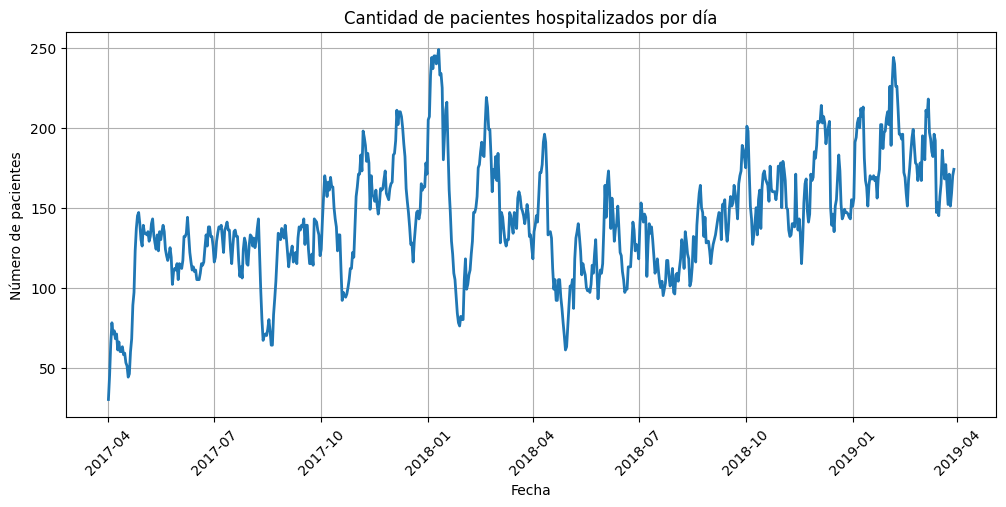

In [16]:

# Expandir el rango de fechas por paciente
df_expanded = (
    df_admission
    .apply(lambda row: pd.date_range(row['admission_date'], row['discharge_date'], freq='D'), axis=1)
    .explode()
    .to_frame(name='date')
)

# Agregar el ID del paciente
df_expanded['serial_number'] = df_admission.loc[df_expanded.index, 'serial_number'].values

# Agrupamos por fecha y contamos
daily_counts = (
    df_expanded
    .groupby('date')
    .size()
    .reset_index(name='num_patients')
)

# Excluimos los ultimos 25 valores ya que sesgan el modelo
daily_counts = daily_counts.iloc[:-25]

# exportar daily_counts a un csv
daily_counts.to_csv('./data/daily_hospitalized_patients.csv', index=False)

# Graficamos la serie temporal
plt.figure(figsize=(12,5))
plt.plot(daily_counts['date'], daily_counts['num_patients'], linewidth=2)
plt.title('Cantidad de pacientes hospitalizados por día')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.ylabel('Número de pacientes')
plt.grid(True)
plt.show()


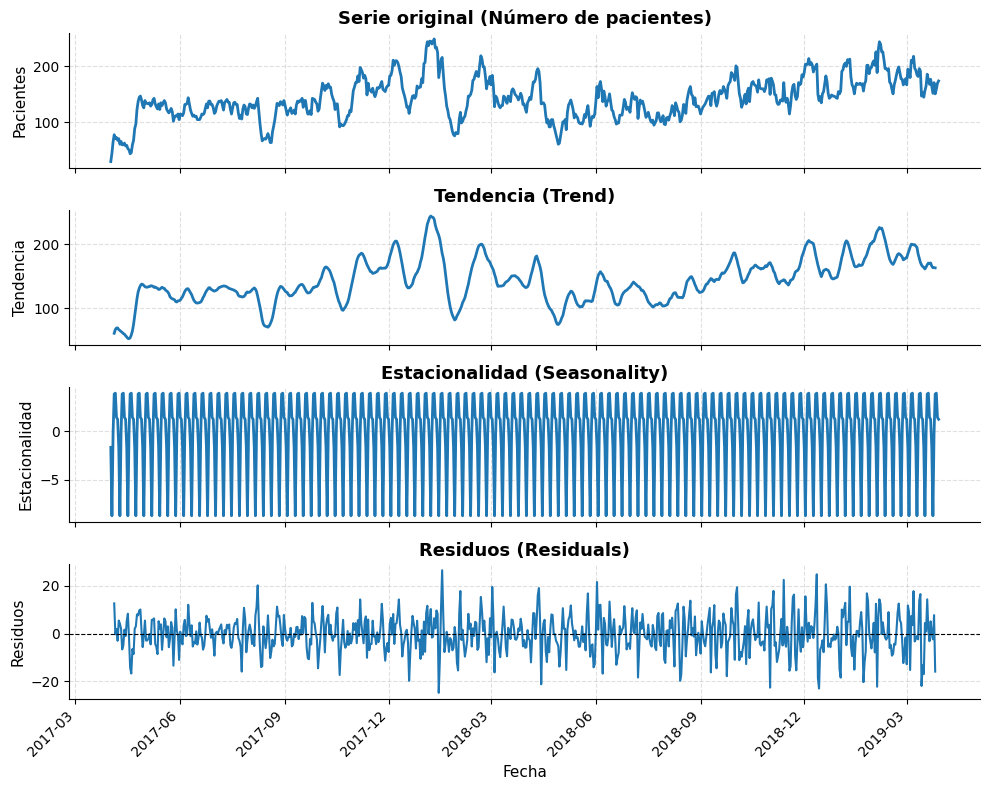

In [17]:
ts = daily_counts.copy()
ts['date'] = pd.to_datetime(ts['date'])
ts = ts.set_index('date').sort_index()

# Asegurar frecuencia diaria y rellenar días faltantes con 0
ts = ts.asfreq('D', fill_value=0)

# Descomposición aditiva (period=7 para estacionalidad semanal)
result = seasonal_decompose(ts['num_patients'], model='additive', period=7)

# Plot personalizado usando el índice datetime (los formatters funcionarán correctamente)
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Serie original
axes[0].plot(ts.index, result.observed, linewidth=2)
axes[0].set_title('Serie original (Número de pacientes)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Pacientes', fontsize=11)

# Tendencia
axes[1].plot(ts.index, result.trend, linewidth=2)
axes[1].set_title('Tendencia (Trend)', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Tendencia', fontsize=11)

# Estacionalidad
axes[2].plot(ts.index, result.seasonal, linewidth=2)
axes[2].set_title('Estacionalidad (Seasonality)', fontsize=13, fontweight='bold')
axes[2].set_ylabel('Estacionalidad', fontsize=11)

# Residuos
axes[3].plot(ts.index, result.resid, linewidth=1.5)
axes[3].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[3].set_title('Residuos (Residuals)', fontsize=13, fontweight='bold')
axes[3].set_ylabel('Residuos', fontsize=11)
axes[3].set_xlabel('Fecha', fontsize=11)

# --- Formatear eje X con fechas ---
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # cada 3 meses
fig.autofmt_xdate(rotation=45)

# Ajustes estéticos
for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

/var/folders/20/xpqdbsrj4wb6tc710ddf8s880000gn/T/ipykernel_1617/167714925.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_male, data_female],


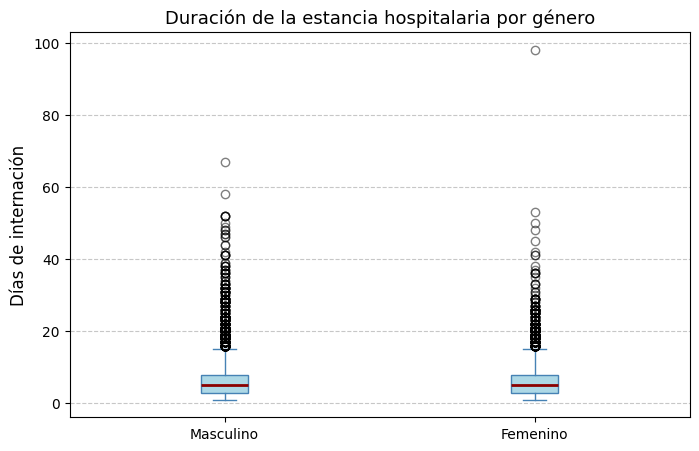

In [18]:

# Filtramos datos válidos (sin NaN en las dos columnas)
df_valid = df_admission.dropna(subset=['length_of_stay_days', 'gender'])

# Agrupamos los datos por género
data_male = df_valid.loc[df_valid['gender'] == 'M', 'length_of_stay_days']
data_female = df_valid.loc[df_valid['gender'] == 'F', 'length_of_stay_days']

# Creamos el boxplot
plt.figure(figsize=(8,5))
plt.boxplot([data_male, data_female],
            labels=['Masculino', 'Femenino'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='steelblue'),
            medianprops=dict(color='darkred', linewidth=2),
            whiskerprops=dict(color='steelblue'),
            capprops=dict(color='steelblue'),
            flierprops=dict(marker='o', color='gray', alpha=0.5))

plt.title('Duración de la estancia hospitalaria por género', fontsize=13)
plt.ylabel('Días de internación', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()
